In [38]:
from sqlalchemy import create_engine
from sqlalchemy.exc import SQLAlchemyError
from sqlalchemy.orm import sessionmaker, scoped_session

In [39]:
def connect(db_host, db_name, db_user, db_pass):
    engine_db = create_engine(f"postgres://{db_user}:{db_pass}@{db_host}/{db_name}")
    conn = engine_db.connect()
    return engine_db, conn

In [40]:
dbType = 'pgsql'
dbHost = 'localhost'
dbDatabase = 'agc'
dbUser = 'xxxx'
dbPassword = 'testing'
tabla = 'indigogo'

engine_db, conn_db = connect(db_host=dbHost, db_name=dbDatabase, db_user=dbUser, db_pass=dbPassword)
datos = f'SELECT * from {tabla}'

df1 = pd.read_sql_query(datos, conn_db)
conn_db.close()

df1

,index,funds_raised_amount,funds_raised_percent,product_stage
0,4730,2732946.0,38.940700,production
1,4741,64513.0,1.278300,prototype
2,4742,40.0,0.002000,concept
3,4743,188.0,0.001880,concept
4,4752,7820.0,0.041376,prototype
...,...,...,...,...
76216,1221,130.0,0.006500,concept
76217,1226,1892.0,0.072769,concept
76218,1230,531.0,0.068961,prototype
76219,1232,15894.0,15.894000,concept


In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [52]:
plt.figure(figsize=(10,5))
lista = df1.sort_values(by=['funds_raised_amount'])
print(lista.funds_raised_amount)

31              1.0
22430           1.0
184             1.0
66888           1.0
65334           1.0
            ...    
60533    51486048.0
64774    51486048.0
73169    51486048.0
69823    51486048.0
61470    51486048.0
Name: funds_raised_amount, Length: 76221, dtype: float64


<Figure size 720x360 with 0 Axes>

                        funds_raised_amount
funds_raised_amount                        
(0.999, 1895.0]                5.895461e+02
(1895.0, 29657.0]              1.094738e+04
(29657.0, 178091.0]            8.575347e+04
(178091.0, 51486048.0]         1.005935e+06


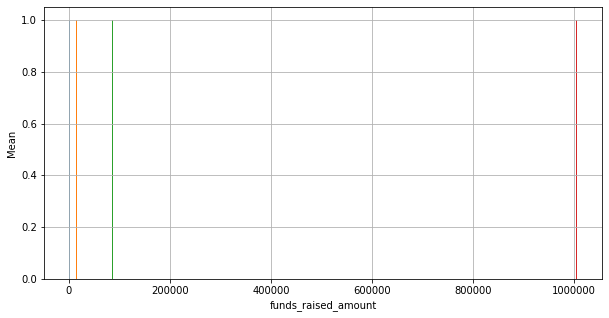

In [53]:
percentiles = [0,25,50,75,100]

grafico = df1.funds_raised_amount.groupby(pd.cut(df1.funds_raised_amount, np.percentile(df1.funds_raised_amount, percentiles), include_lowest=True)).mean()
grafo = grafico.to_frame()
print(grafo)

plt.figure(figsize=(10,5))
plt.hist(grafo, bins= 100)
plt.xlabel('Mean funds_raised_amount by percentile')
plt.xlabel('funds_raised_amount')
plt.ylabel('Mean')
plt.grid()
plt.show()


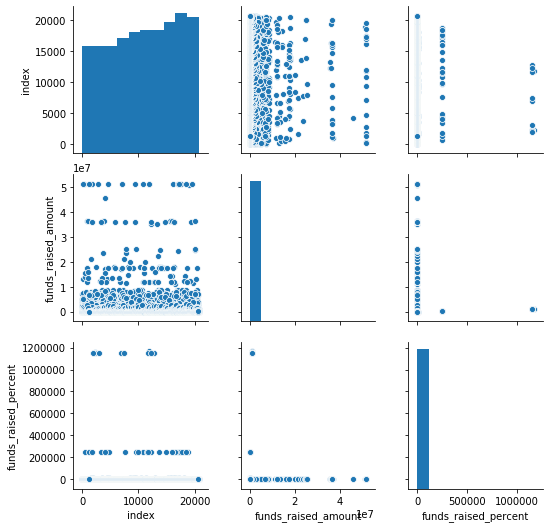

In [54]:
sns.pairplot(data=df1)

In [55]:
# Deuelve una lista por cada fila
lista_variables = df1.funds_raised_amount.tolist()
# Ordenación de los datos.
lista_ordenada_variables = np.sort(lista_variables, axis=None)
frecuencias = pd.Series(lista_ordenada_variables).value_counts().sort_values(ascending=False)
# freq = frecuencias.sort_values(ascending=False)
print ("\nVariable (X) - Frecuencias absolutas (f)\n\n" , frecuencias) 



Variable (X) - Frecuencias absolutas (f)

 150.0        277
250.0        193
25.0         163
440.0        149
50.0         142
            ... 
1019851.0      1
626579.0       1
757483.0       1
47342.0        1
415037.0       1
Length: 13747, dtype: int64


range(1, 279)


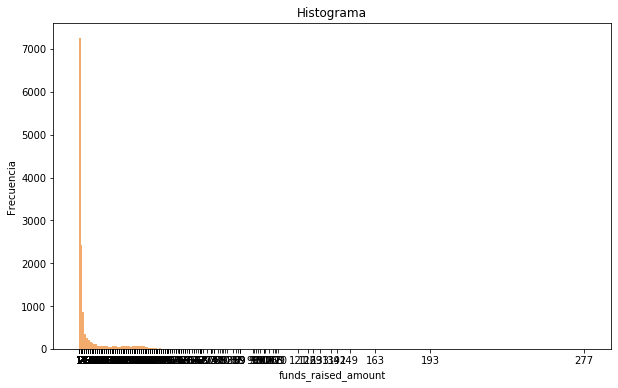

In [57]:
intervalos = range(min(frecuencias), max(frecuencias) + 2) #calculamos los extremos de los intervalos
print(intervalos)

plt.figure(figsize=(10,6))
plt.hist(x=frecuencias, bins=intervalos, color='#F2AB6D')
plt.title('Histograma')
plt.xlabel('funds_raised_amount')
plt.ylabel('Frecuencia')
plt.xticks(frecuencias)

plt.show() #dibujamos el histograma